In [1]:
# drawing utils
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, colors
from matplotlib import animation
# from matplotlib.colors import hsv_to_rgb
#matplotlib.rcParams['text.usetex'] = True

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

from cycler import cycler

import os
import re


# math utils
import numpy as np

# statistics utils
import pandas as pd

In [2]:
#对文件夹里的文件分类

def get_key_list(folder_path):
    key_list = []
    print(filepath)
    for i in range(len(filepath)):
        for j in range(len(filepath[i])):
            if filepath[i][j] == '_':
                start_index = j
            elif filepath[i][j] == 'p':
                end_index = j
            key_list.append(filepath[i][start_index+1:end_index+2])
    return keylist
    

def FileNameParse(folder_path):
    filepath = []
    for maindir, subdie, file_name_list in os.walk(folder_path):
        for file_name in file_name_list:
            filepath.append(os.path.join(maindir, file_name))  
    DelayList = []
    start_index = 0
    end_index = 0
    FileDict = {}
    for i in range(len(filepath)):
        for j in range(len(filepath[i])):
            if filepath[i][j] == '_':
                start_index = j
            elif filepath[i][j] == 'p':
                end_index = j
            Delay = filepath[i][start_index+1:end_index+2]  
        FileDict.setdefault(Delay,[]).append(filepath[i])
    return FileDict


In [3]:
# Normalization 2D Data
def get_index(array, number):
    for i in range(len(array)):
        array[i] = abs(array[i]- number)
    print(array)
    min_index = np.argmin(array)
    return index

#数据平均、截取
def parse_pp_data(file_path_list, pump_min, pump_max,probe_min, probe_max):
    rdata = np.loadtxt(file_path_list[1])
    probe_wavelength = rdata[0,1:]
    pump_wavelength = Delay = rdata[1:,0]
    pump_min_index = np.searchsorted(pump_wavelength, pump_min)
    pump_max_index = np.searchsorted(pump_wavelength, pump_max)
    pump_wavelength = pump_wavelength[pump_min_index:pump_max_index]
    probe_min_index = np.searchsorted(probe_wavelength, probe_min)
    probe_max_index = np.searchsorted(probe_wavelength, probe_max)
    probe_wavelength = probe_wavelength[probe_min_index:probe_max_index]
    data = np.zeros([pump_max_index - pump_min_index,probe_max_index - probe_min_index])
    for file_path in file_path_list:
        rdata = np.loadtxt(file_path)
        data = rdata [pump_min_index:pump_max_index,probe_min_index:probe_max_index]+data
#    print("Processing", file_path_list)
    data_max=np.amax(np.absolute(data))
    Data = np.transpose(data/data_max)*-1
    Dmax = Data.max()
    Dmin = Data.min()
    return probe_wavelength, pump_wavelength, Delay, Data, Dmax, Dmin

#colormap调整
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

0ps


<IPython.core.display.Javascript object>


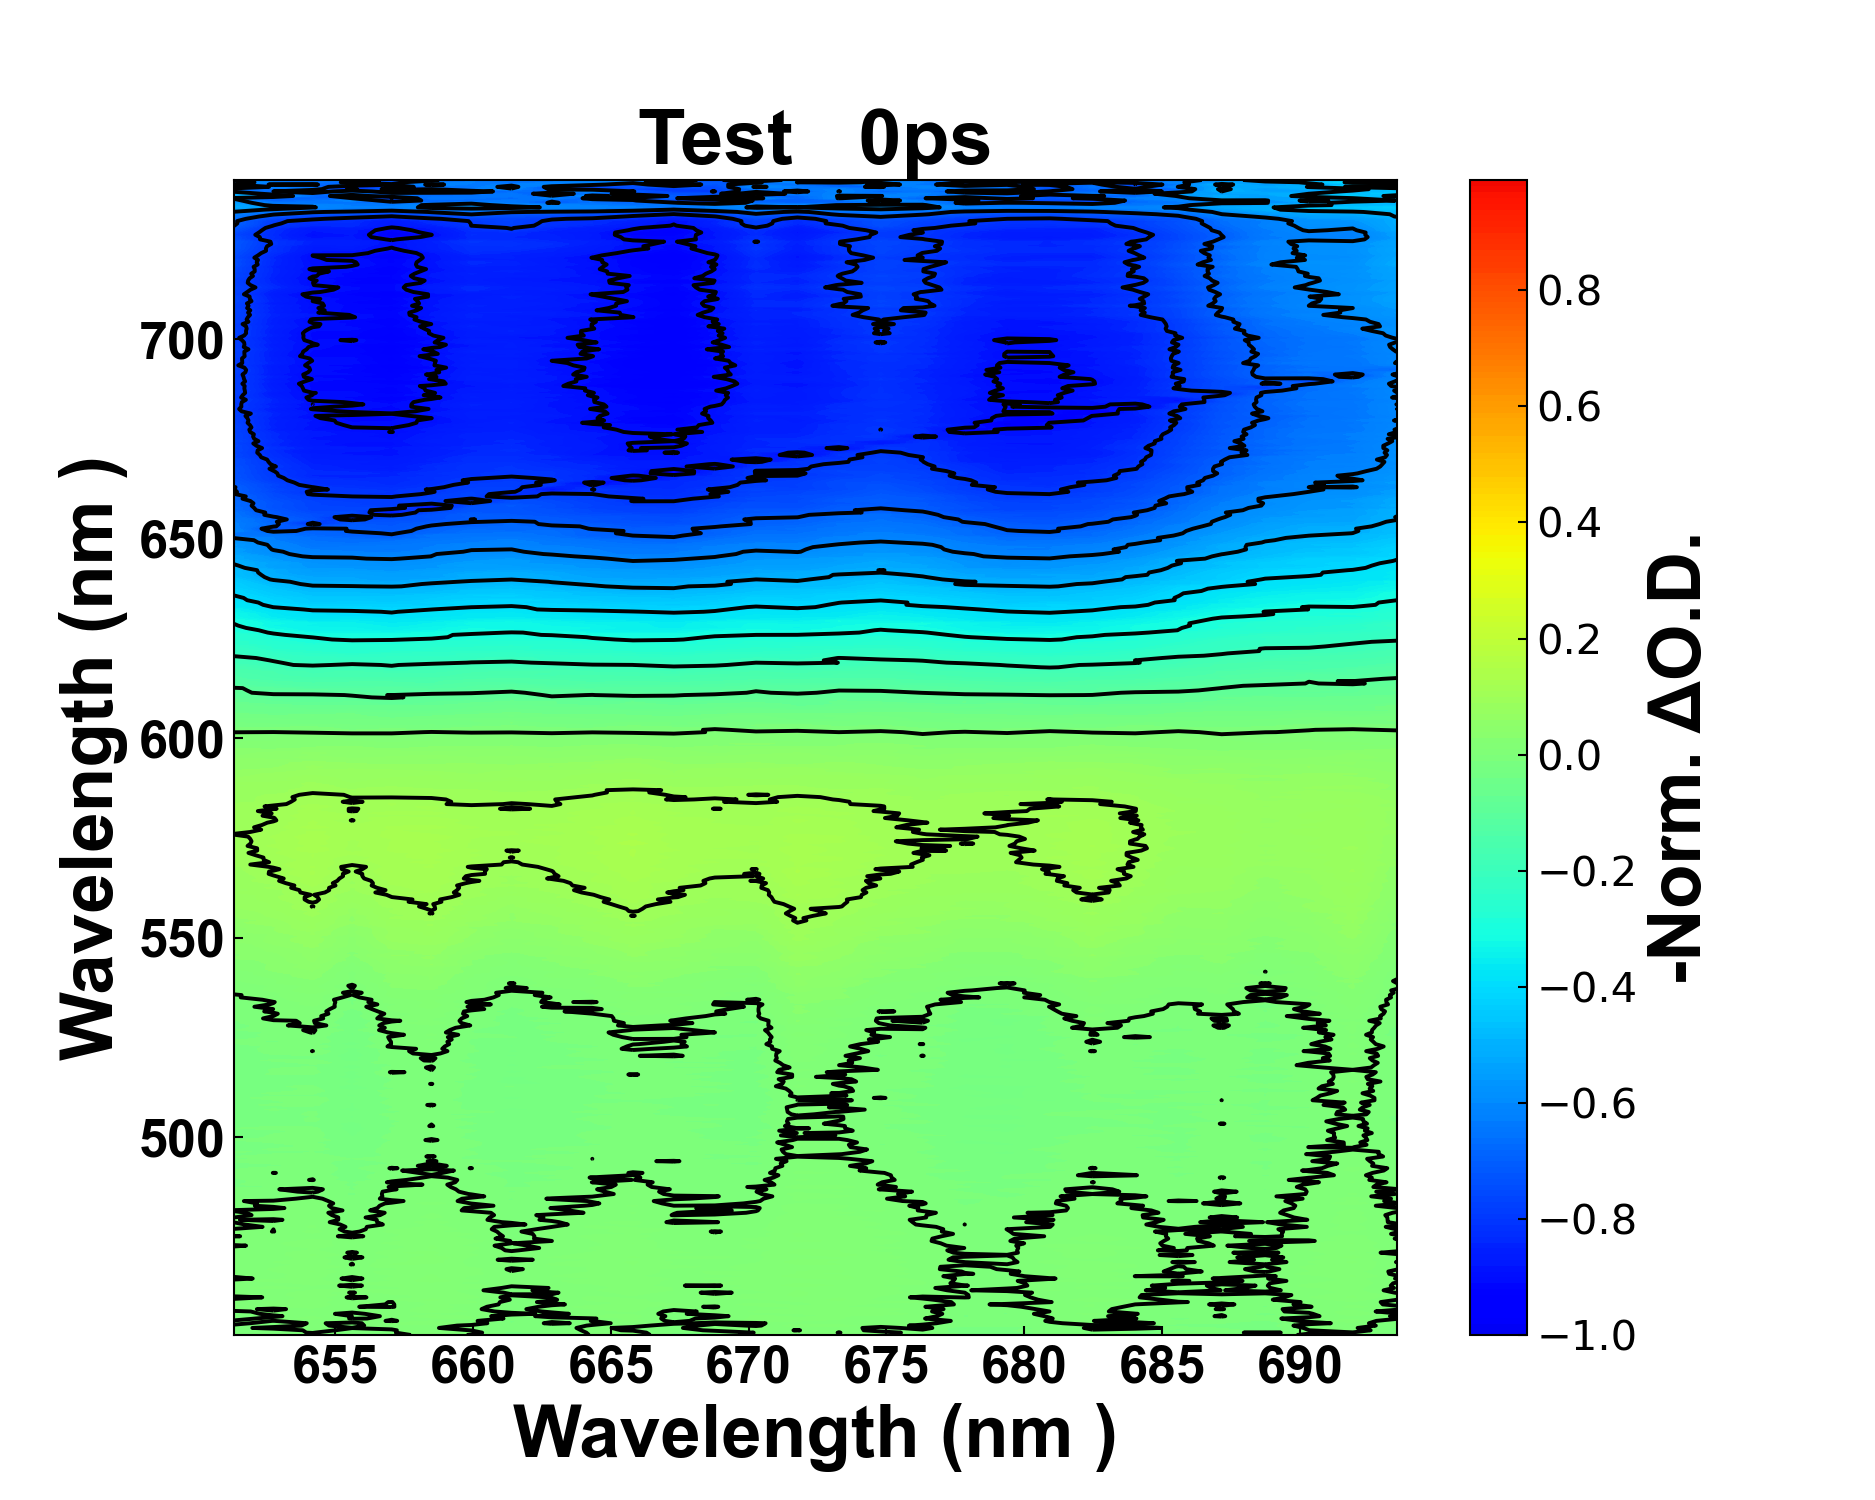

0ps
end


In [4]:
# 画图
def plot_pp_2d(filepath_list, sample_name, figfolder_path, delay, pump_min, pump_max,probe_min, probe_max):
    fig,ax=plt.subplots(figsize=(10,8))
    figtitle = sample_name +'   '+ delay 
    probe_wavlength, pump_wavelength,delay_list_2, data, dmax, dmin = parse_pp_data(filepath_list, pump_min, pump_max,probe_min, probe_max)
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    plt.xlabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.ylabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=20, weight='bold')
    plt.yticks(fontproperties='Arial', size=20, weight='bold')
    levels = np.arange(-1, 1, 0.01)
    level2 = [-1,-0.95,-0.9,-0.85,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    level3 = np.arange(-1, 1, 0.1)
    cmap = plt.get_cmap('jet')
    trunc_cmap = truncate_colormap(cmap, 0.1, 0.9,400)
    im = ax.contourf(pump_wavelength, probe_wavlength, data, levels=levels, cmap=trunc_cmap, extend="neither")
    ax.contour(pump_wavelength, probe_wavlength, data, levels=level3, colors='black', linestyles='solid')
    cbar = plt.colorbar(im,)
    cbar.set_label('-Norm. '+chr(916)+'O.D.', font = 'Arial', fontsize = 28, weight='bold')
    cbar.ax.tick_params(labelsize=16)
#    cbar = fig.colorbar(im, ax=ax, orientation='vertical', label='Normalized Delta O.D.')
#    plt.show()
    if not os.path.exists('./'+figfolder_path):
        os.makedirs('./'+figfolder_path)
    print(delay)
#    figpath = delay+'.png'
#    print(figpath)   
    figpath=r'./'+figfolder_path+r'/'+sample_name+'_'+delay+r'.png'
    fig.savefig(figpath, dpi=200, format='png')
    return 0 

    
folder_path=r'I:\OneDrive-332\Python\Test\20220808-magic-680-40uw'
file_dict=FileNameParse(folder_path)
#print(file_dict)   
delay_list=list(file_dict.keys())
sample_name = re.split(r'\\',folder_path)[-2]
folder_name =sample_name+'-'+re.findall(r'\\([0-9a-z-]+?)w',folder_path)[0]+'w'
pump_min = 650
pump_max = 695
probe_min = 450
probe_max = 740
for delay in delay_list:
    print(delay)
    plot_pp_2d(file_dict[delay],sample_name,folder_name,delay, pump_min, pump_max,probe_min, probe_max)

print('end')

#fig.savefig('test.png')

